<a href="https://colab.research.google.com/github/danielmpedrozo/russian_plate_ocr/blob/main/OCR_Pytesseract_Haarcascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import cv2
from time import sleep
import imutils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import pytesseract


def roi_placa(img, plate):
    img_roi = img[plate[0][1]:plate[0][1] + plate[0][3], plate[0][0]: plate[0][0] + plate[0][2]]
    return img_roi


def tratamento_roi_img(img_roi):
    img_roi_gray = cv2.cvtColor(img_roi, cv2.COLOR_BGR2GRAY)
    img_roi_binary = cv2.threshold(img_roi_gray, 85, 255, cv2.THRESH_BINARY)[1]
    img_roi_binary = cv2.resize(img_roi_binary, None, fx=4, fy=4)

    return img_roi_binary


def ocr_img(img_roi_binary):
    img_roi_binary = Image.fromarray(img_roi_binary)


    config = r'-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6'

    text = pytesseract.image_to_string(img_roi_binary, lang='eng', config=config)
    text_f = []
    for letra in text:
      if letra in ('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'):
        text_f.append(letra)

    text_f = ''.join(text_f)

    return text_f



def draw_img(img, text, plate):
    font = cv2.FONT_HERSHEY_SIMPLEX
    for (x, y, w, h) in plate:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img, text=text, org=(x, y), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2,
                    lineType=cv2.LINE_AA)
    return img




In [12]:

plate_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/PycharmProjects/russian_plate/haarcascade_russian_plate_number.xml')
frame = cv2.imread('/content/drive/MyDrive/PycharmProjects/russian_plate/car_images/IMG_4046 (1).png')


gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

plate = plate_classifier.detectMultiScale(gray_frame, 1.1, 3)



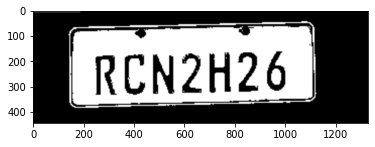

In [8]:
img_roi = roi_placa(frame, plate)

treated_img_roi = tratamento_roi_img(img_roi)

plt.imshow(cv2.cvtColor(treated_img_roi, cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
text = ocr_img(treated_img_roi)
text

'RCN2H26'

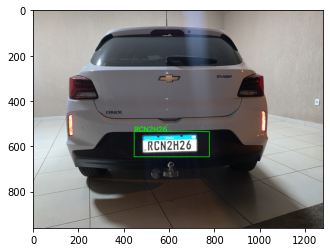

In [10]:
frame = draw_img(frame, text, plate)

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()